# IMPORTS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# LOAD YOUR CLEANED DATAFRAME

In [2]:

df = pd.read_csv("titanic_cleaned.csv")   

# DEFINE FEATURES & TARGET

In [3]:

y = df["survived"]
X = df.drop(columns=["survived"])

# Columns to scale

In [4]:
cols_to_scale = ["age", "fare"]

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

# TRAIN/TEST SPLIT

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

1) LOGISTIC REGRESSION

In [6]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

print("===== Logistic Regression =====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

===== Logistic Regression =====
Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



2) RANDOM FOREST CLASSIFIER

In [7]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("===== Random Forest =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

===== Random Forest =====
Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.74      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



CONFUSION MATRICES

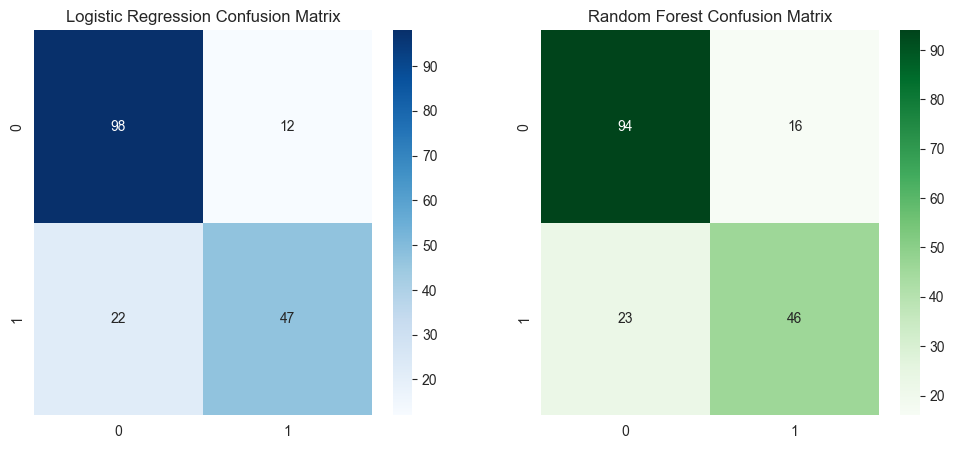

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")

plt.show()

# ROC CURVES

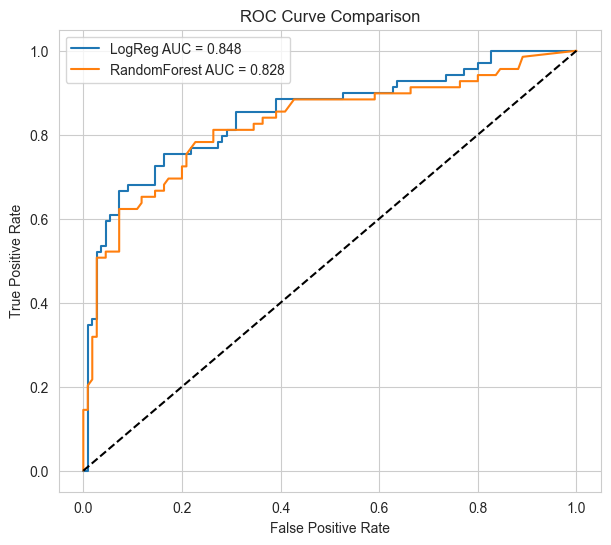

In [9]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7, 6))
plt.plot(fpr_log, tpr_log, label=f"LogReg AUC = {roc_auc_score(y_test, y_prob_log):.3f}")
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest AUC = {roc_auc_score(y_test, y_prob_rf):.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# RANDOM FOREST FEATURE IMPORTANCE

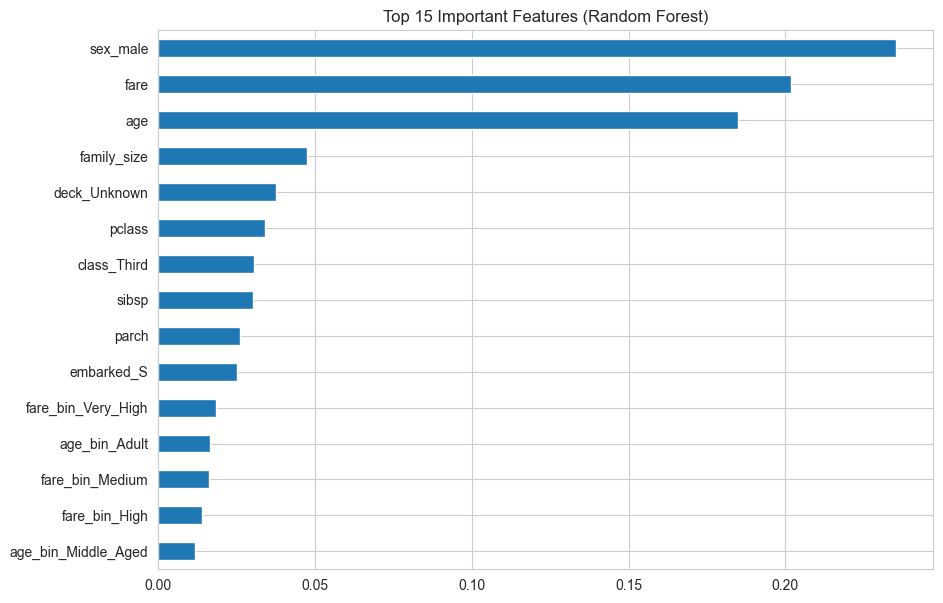

In [10]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 7))
importances[:15].plot(kind="barh")
plt.title("Top 15 Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.show()